In [11]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#Sci-kit Learn Linear Regression Approach
data = pd.read_csv('city_temperature.csv', low_memory=False, usecols=['Year', 'AvgTemperature'])
filtered_data = data[(data['Year'] >= 1995) & (data['Year'] < 2020)]
clean_data = filtered_data.groupby('Year')['AvgTemperature'].mean().reset_index()


print(data.head())


   Year  AvgTemperature
0  1995            64.2
1  1995            49.4
2  1995            48.8
3  1995            46.4
4  1995            47.9


               Year  AvgTemperature
count  2.906327e+06    2.906327e+06
mean   2.006624e+03    5.600492e+01
std    2.338226e+01    3.212359e+01
min    2.000000e+02   -9.900000e+01
25%    2.001000e+03    4.580000e+01
50%    2.007000e+03    6.250000e+01
75%    2.013000e+03    7.550000e+01
max    2.020000e+03    1.100000e+02


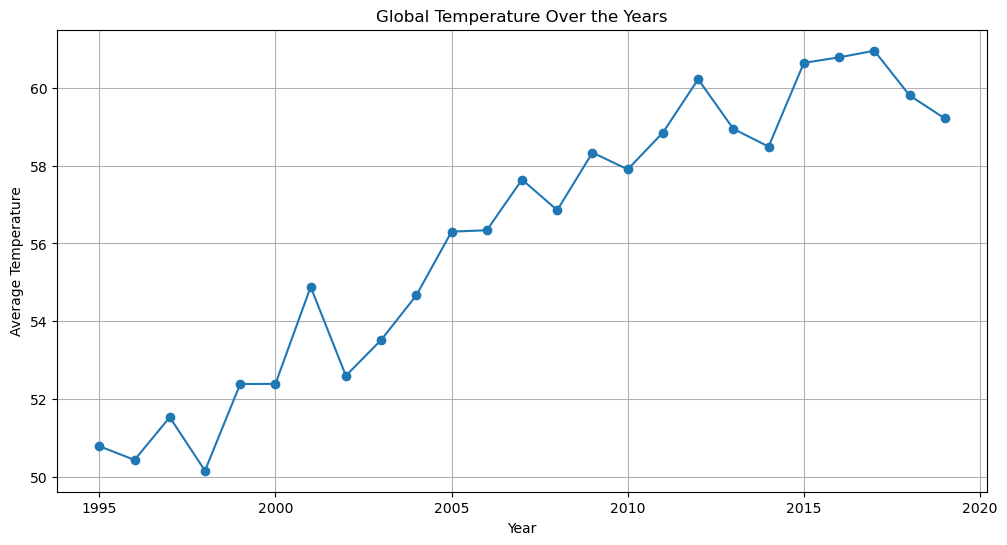

In [13]:
print(data.describe())

plt.figure(figsize=(12,6))
plt.plot(clean_data['Year'], clean_data['AvgTemperature'], marker='o')
plt.title('Global Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)

plt.show()


In [14]:
X = clean_data['Year'].values.reshape(-1,1)
y = clean_data['AvgTemperature'].values

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict temperatures for the test set
y_pred = model.predict(X_test)


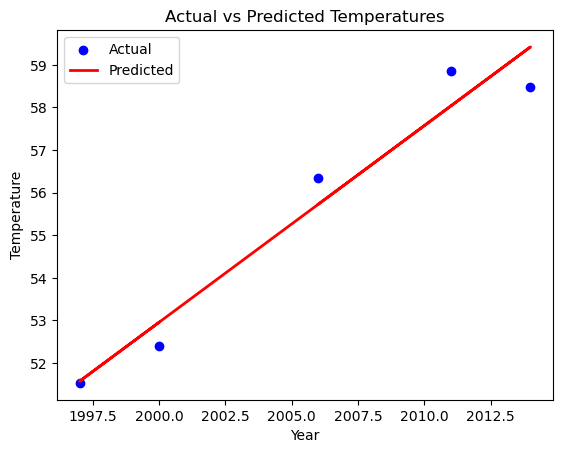

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [18]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.4454310622127826


In [19]:
future_years = np.array([[year] for year in range(2024, 2051)])
future_temps = model.predict(future_years)

predicted_data = pd.DataFrame({
    'Year': future_years.ravel(),
    'PredictedTemperature': future_temps
})

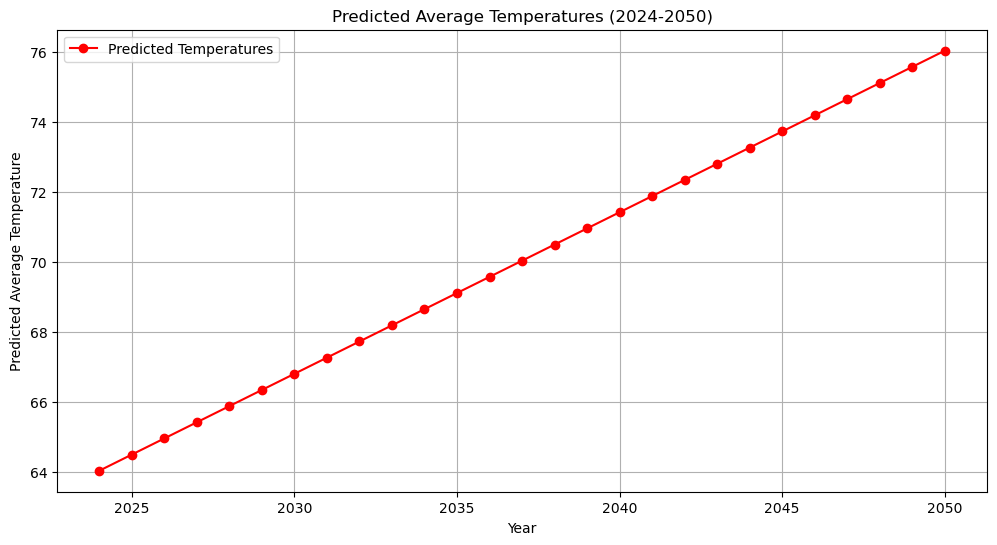

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_data['Year'], predicted_data['PredictedTemperature'], marker='o', 
         color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Predicted Average Temperature')
plt.title('Predicted Average Temperatures (2024-2050)')
plt.grid(True)
plt.legend()
plt.show()